## Notes

In [1]:
#Find the time of the next reaction
#Find which is next reaction
#update t+=tau
#x+=sm

#tau1 ~Exp(W1)
#tau2 ~Exp(W2)
#tau = min(tau1,tau2)

#1) generate tetai for each i
#tau = min{taui}
#mi = argmin{taui}
#2) update


#generating rantom numbers for each reaction

#Alghorithm 2 
#p(tau1<tau) = 1 - e^(-w1*tau)
#p(tau2<tau) = 1 - e^(-w2*tau)
#p(max(tau1,tau2)) < tau --> product of the above probabilities
#(1-e^(-w1*tau))(1-e^(-w2*tau))

#Gillespi direct
#Next reaction method

#max J
#prediction of J

## Libraries

In [2]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

from skimage import io, measure               # Module from skimage
from skimage.filters import gaussian # Module working with a gaussian filter                           # Library to work with file paths
import os
%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

from skimage.morphology import binary_dilation
from skimage.segmentation import watershed
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening
from skimage.morphology import disk
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from skimage.segmentation import watershed    # Watershed algorithm
from skimage.filters import difference_of_gaussians
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as ski_io, color as ski_color, filters as ski_filters
from PIL import Image
import cellpose
import scipy as sp
import cv2
import os
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.filters import difference_of_gaussians
from skimage.measure import label, regionprops, find_contours
from skimage import measure
from IPython.display import Image, display
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize

## Model

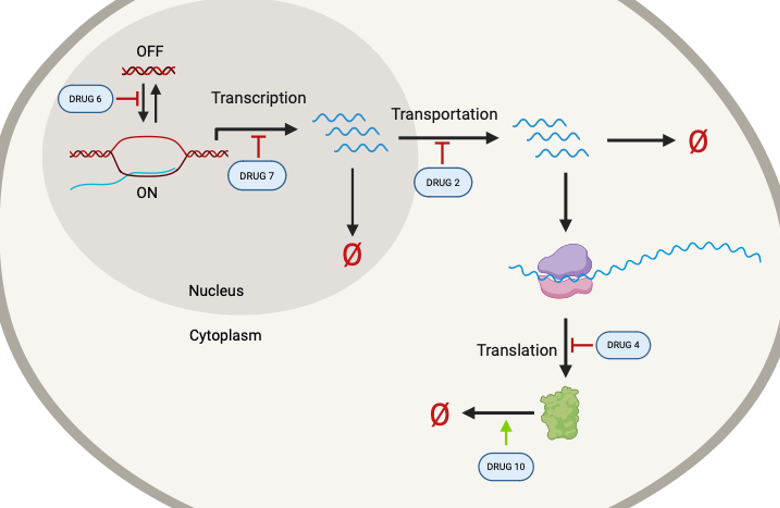

In [3]:
display(Image(filename='Drugs cartoon.png'))

In [4]:
#model variables

#x1 = gene (DNA) ON
#x2 = gene (DNA) OFF
#x3 = mRNA nuclei
#x4 = mRNA cytoplasm
#x5 = protein

#Reactions
#R1 = Gene Activation
#R2 = Gene deactivation
#R3 = Gene Transcription
#R4 = mRNA Nuclear Export
#R5 = mRNA Nuclear degradation
#R6 = mRNA Cytoplasmic degradation
#R7 = mRNA Cytoplasmic Translation
#R8 = protein Degradation

#initial conditions
x1 = 1
x2 = 0
x3 = 5
x4 = 8
x5 = 760

#simulation time
t = 0
T = 2000
drug_time = 40

#stochiometry = [[-1,0,0,0],[0,1,0,0],[0,-1,1,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1],[0,0,0,-1]]

S1 = np.array([1,-1,0,0,0])
S2 = np.array([-1,1,0,0,0])
S3 = np.array([0,0,1,0,0])
S4 = np.array([0,0,-1,1,0])
S5 = np.array([0,0,-1,0,0])
S6 = np.array([0,0,0,-1,0])
S7 = np.array([0,0,0,0,1])
S8 = np.array([0,0,0,0,-1])

k1 = 0.1
k2 = 0.1
k3 = 0.1
k4 = 0.1
k5 = 0.1
k6 = 0.1
k7 = 0.1
k8 = 0.1

w1 = k1*x1
w2 = k2*x1
w3 = k3*x2
w4 = k4*x2
w5 = k5*x3
w6 = k6*x3
w7 = k7*x4
w8 = k8*x5


r1 = k1*x1 - k2*x2
r2 = k2*x2 - k1*x1
r3 = k3*x1
r4 = -k4*x3 + k4*x4
r5 = -k5*x3
r6 = -k6*x4
r7 = k7*x4
r8 = -k8*x5



In [7]:
#stechiometry matrix
S = np.array([S1,S2,S3,S4,S5,S6,S7,S8])

#rate constants
k = np.array([k1,k2,k3,k4,k5,k6,k7,k8])

#propensity functions
w = np.array([w1,w2,w3,w4,w5,w6,w7,w8])

# Initial state
x = np.array([x1, x2, x3, x4])

dx_dt = S.T*w

print(dx_dt)

# Time points
t = np.linspace(0, 2000, 200)



[[  0.1  -0.1   0.    0.    0.    0.    0.    0. ]
 [ -0.1   0.1   0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   -0.   -0.5   0.    0.    0. ]
 [  0.    0.    0.    0.    0.   -0.5   0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.8 -76. ]]


In [ ]:
#read csv file
#df = pd.read_csv('./TrueData/Drug2_1000nM_DesignResults.csv')
dataRaw = pd.read_csv('./TrueData/NoDrug_DesignResults.csv')
print(df)

           Cell_id  Rep_Num  FOV_Num  drug_time  drug_concentration  cell_Num  \
0      rep1_FOV1_1        1        1        inf                   0         1   
1      rep1_FOV1_1        1        1        inf                   0         1   
2      rep1_FOV1_1        1        1        inf                   0         1   
3      rep1_FOV1_1        1        1        inf                   0         1   
4      rep1_FOV1_1        1        1        inf                   0         1   
...            ...      ...      ...        ...                 ...       ...   
2956  rep2_FOV6_11        2        6        inf                   0        11   
2957  rep2_FOV6_11        2        6        inf                   0        11   
2958  rep2_FOV6_11        2        6        inf                   0        11   
2959  rep2_FOV6_11        2        6        inf                   0        11   
2960  rep2_FOV6_11        2        6        inf                   0        11   

      Time  num_rna_cyto  n

In [ ]:
# Parse data to create tensor containing all data in format:
# [Cell, Time, NascentRNA, NuclearRNA, CytoplasmicRNA, Protein, Vitality]
k = 0

Reps = np.unique(dataRaw['Rep_Num'])
FOVs = np.unique(dataRaw['FOV_Num'])
Times = np.unique(dataRaw['Time'])
Cells = np.unique(dataRaw['Cell_id'])

print('Total Reps: ', len(Reps))
print('Total FOVs: ', len(FOVs))
print('Total cells: ', len(Cells))
print('Time points: ', len(Times))

dataTensor = np.zeros((len(Cells), len(Times), 5))

for iCell in range(len(Cells)):
    for iTime in range(len(Times)):
        if dataRaw['is_cell_vital'][k]==1:
            dataTensor[iCell, iTime, 0] = dataRaw['num_rna_nascent'][k]
            dataTensor[iCell, iTime, 1] = dataRaw['num_rna_nuc'][k]
            dataTensor[iCell, iTime, 2] = dataRaw['num_rna_cyto'][k]
            dataTensor[iCell, iTime, 3] = dataRaw['Cyto_Intensity_1'][k]
            dataTensor[iCell, iTime, 4] = 1
        else:
            dataTensor[iCell, iTime, 0] = np.nan
            dataTensor[iCell, iTime, 1] = np.nan
            dataTensor[iCell, iTime, 2] = np.nan
            dataTensor[iCell, iTime, 3] = np.nan
            dataTensor[iCell, iTime, 4] = 0
        k += 1

Total Reps:  2
Total FOVs:  6
Total cells:  141
Time points:  21


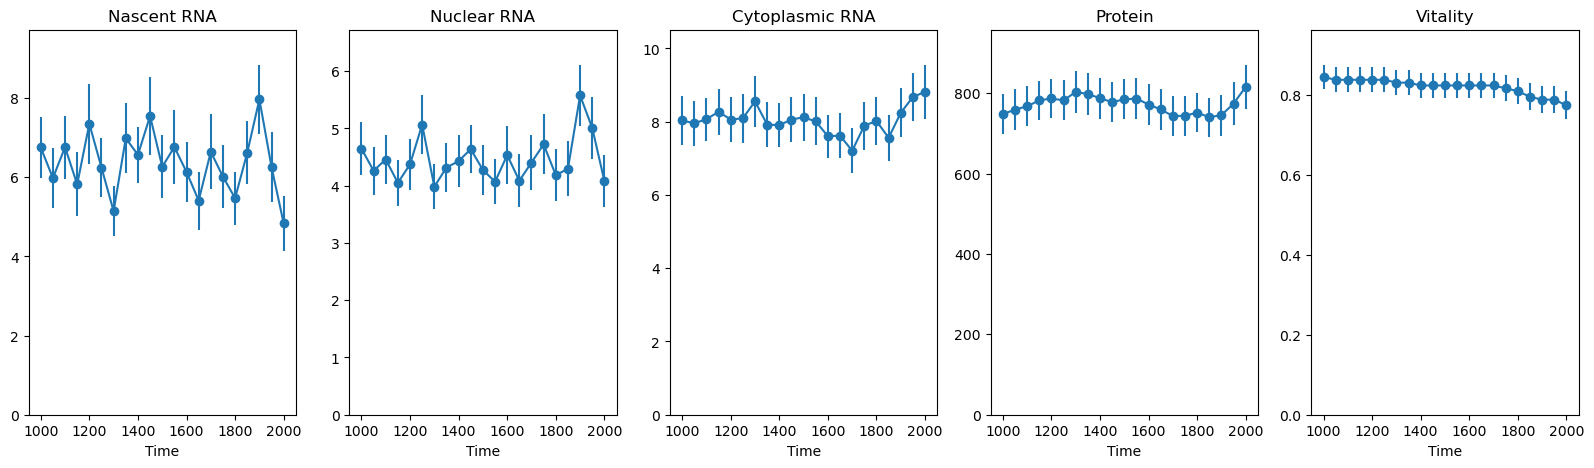

In [ ]:
# Calculate mean and SEM of each data type at each time point. Ignore NaN values.
dataMean = np.nanmean(dataTensor, axis=0)
dataStd = np.nanstd(dataTensor, axis=0) / np.sqrt(np.sum(~np.isnan(dataTensor), axis=0))

featureNames = ['Nascent RNA', 'Nuclear RNA', 'Cytoplasmic RNA', 'Protein', 'Vitality']

# Plot data
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    ax[i].errorbar(Times, dataMean[:, i], yerr=dataStd[:, i], fmt='-o')
    ax[i].set_title(featureNames[i])
    ax[i].set_xlabel('Time')
    ax[i].set_ylim([0, 1.1 * np.nanmax(dataMean[:, i] + dataStd[:, i])])

In [ ]:
# Define the system of ODEs
def model(y, t, k):
    x1, x2, x3, x4, x5 = y
    k1, k2, k3, k4, k5, k6, k7, k8 = k
    dx1dt = -k1 * x1 + k2 * x2
    dx2dt = k1 * x1 - k2 * x2
    dx3dt = k3 * x1 - k4 * x3 - k5 * x3
    dx4dt = k4 * x3 - k6 * x4 - k7 * x4
    dx5dt = k7 * x4 - k8 * x5
    return [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt]

# Initial conditions
y0 = [1, 0, 5, 8, 760]

# Time points
t = np.linspace(0, 2000, 200)

# Observed data (example, replace with actual data)
observed_data = np.array([dataRaw['num_rna_nuc'], dataRaw['num_rna_cyto'], dataRaw['protein_concentration']])

# Objective function
def objective(k):
    # Integrate the ODEs
    solution = odeint(model, y0, t, args=(k,))
    # Extract the protein (or other state variables)
    protein = solution[:, 4]
    # Calculate the sum of squared errors
    error = np.sum((protein - observed_data) ** 2)
    return error

# Initial guess for the parameters
k0 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Perform the optimization
result = minimize(objective, k0, method='L-BFGS-B', bounds=[(0, None)]*8)

# Optimal parameters
optimal_k = result.x
print("Optimal parameters:", optimal_k)

KeyError: 'protein_concentration'

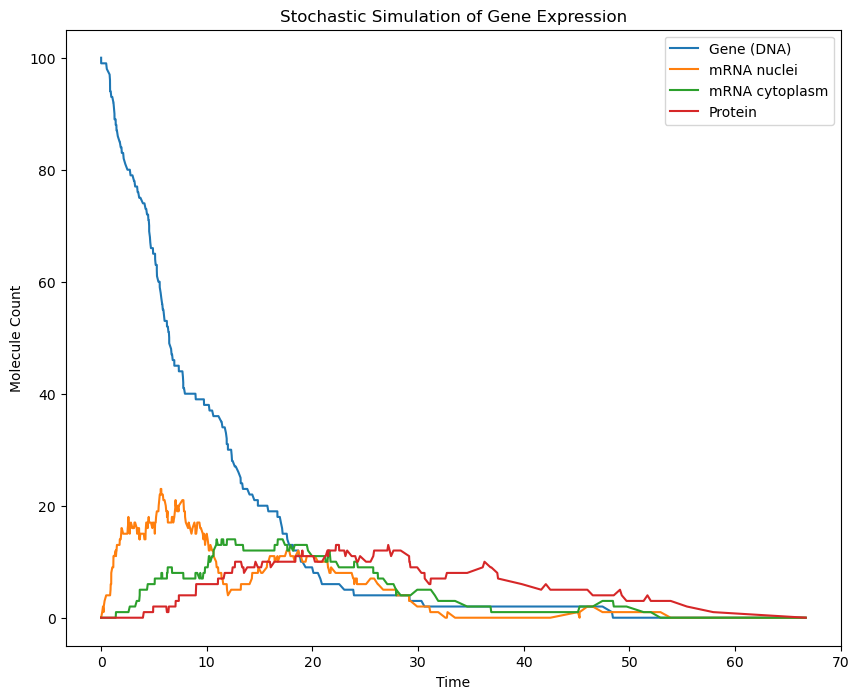

In [ ]:
# Lists to store results
time = 0
T = 100
times = [time]
results = [x.copy()]

#add drug to the model which stops the transcription of the gene or is helping degradation of the gene




# Gillespie algorithm
while time < T:
    a = propensities(x)
    a0 = a.sum()
    if a0 == 0:
        break
    r = np.random.random(2)
    tau = (1 / a0) * np.log(1 / r[0])
    mu = np.searchsorted(np.cumsum(a), r[1] * a0)
    
    x += S[mu]
    time += tau
    
    times.append(time)
    results.append(x.copy())

results = np.array(results)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(times, results[:, 0], label='Gene (DNA)')
plt.plot(times, results[:, 1], label='mRNA nuclei')
plt.plot(times, results[:, 2], label='mRNA cytoplasm')
plt.plot(times, results[:, 3], label='Protein')
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.legend()
plt.title('Stochastic Simulation of Gene Expression')
plt.show()

True parameters: [0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Estimated parameters: [0.45572459 0.51108177 0.31993442 0.5918444  0.75608667 0.65739451
 0.8687928 ]


C:\Users\wikto\AppData\Local\Temp\ipykernel_18904\3359983346.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  tau = (1 / a0) * np.log(1 / r[0])
C:\Users\wikto\AppData\Local\Temp\ipykernel_18904\3359983346.py:32: RuntimeWarning: divide by zero encountered in log
  return np.log(a).sum() - a0
c:\Users\wikto\anaconda3\envs\uqbio2024_py310\lib\site-packages\scipy\optimize\_optimize.py:836: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


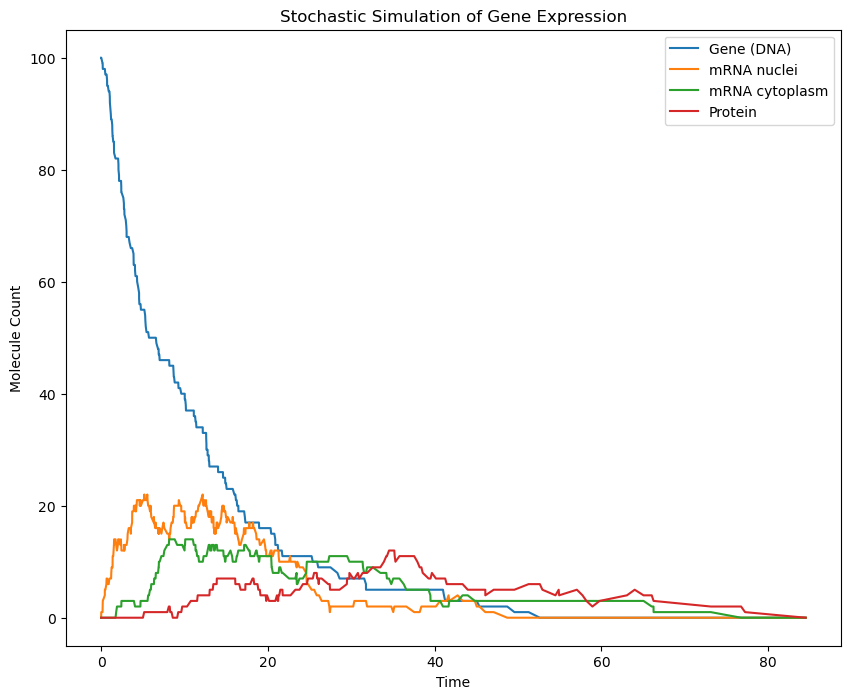

In [ ]:
# estimate the best set of model parameters
# estimate the best set of model parameters

# Stoichiometry matrix
S = np.array([
    [-1, 0, 0, 0],  # R1: Gene Degradation
    [0, 1, 0, 0],   # R2: Gene Transcription
    [0, -1, 1, 0],  # R3: mRNA Nuclear Export
    [0, -1, 0, 0],  # R4: mRNA Nuclear Degradation
    [0, 0, -1, 0],  # R5: mRNA Cytoplasmic Degradation
    [0, 0, 0, 1],   # R6: mRNA Cytoplasmic Translation
    [0, 0, 0, -1]   # R7: Protein Degradation
])

# Propensity functions
def propensities(x, theta):
    k1, k2, k3, k4, k5, k6, k7 = theta
    return np.array([
        k1 * x[0],  # R1
        k2 * x[0],  # R2
        k3 * x[1],  # R3
        k4 * x[1],  # R4
        k5 * x[2],  # R5
        k6 * x[2],  # R6
        k7 * x[3]   # R7
    ])

# Log-likelihood function
def log_likelihood(x, theta):
    a = propensities(x, theta)
    a0 = a.sum()
    return np.log(a).sum() - a0

# Initial state
x = np.array([x1, x2, x3, x4])

# True parameter values
theta_true = np.array([k1, k2, k3, k4, k5, k6, k7])

# Generate data
T = 100
times = [0]
results = [x.copy()]
while times[-1] < T:
    a = propensities(x, theta_true)
    a0 = a.sum()
    r = np.random.random(2)
    tau = (1 / a0) * np.log(1 / r[0])
    mu = np.searchsorted(np.cumsum(a), r[1] * a0)
    x += S[mu]
    times.append(times[-1] + tau)
    results.append(x.copy())
times = np.array(times)
results = np.array(results)

# Estimate the parameters
from scipy.optimize import minimize

def loss(theta):
    return -log_likelihood(results, theta)

theta0 = np.random.random(7)
res = minimize(loss, theta0, method='Nelder-Mead')
theta_hat = res.x

print('True parameters:', theta_true)
print('Estimated parameters:', theta_hat)

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(times, results[:, 0], label='Gene (DNA)')
plt.plot(times, results[:, 1], label='mRNA nuclei')
plt.plot(times, results[:, 2], label='mRNA cytoplasm')
plt.plot(times, results[:, 3], label='Protein')
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.legend()
plt.title('Stochastic Simulation of Gene Expression')
plt.show()


